**AIVLE School 미니프로젝트**
### **네비게이션 주행데이터를 이용한 <span style="color:darkgreen">도착시각</span> 예측 문제**
---

<br>

In [29]:
import sklearn as sk
import pandas as pd
import json 
import seaborn as sns
import matplotlib.pyplot as plt

<br>

## 데이터 불러오기 

In [5]:
with open ('A0007IT.json', 'r') as file:
    data = json.load(file)

In [6]:
df = pd.DataFrame(data)
df

,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,35:21.0,55:22.6,12914.0,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,55:22.0,09:06.9,7483.0,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,13:46.0,22:32.9,8087.0,526.710998,55.273575,경기도,김포시,6,0,0,20
3,13:43.0,28:42.7,10528.0,898.581970,42.178456,경기도,광주시,2,0,0,20
4,01:57.0,17:58.2,10636.0,957.758972,39.978326,경기도,안산시 상록구,28,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...
55526,57:07.0,06:15.7,4448.0,544.301025,29.419015,경기도,파주시,22,4,23,24
55527,57:26.0,07:15.3,3106.0,535.666992,20.874163,서울특별시,구로구,16,4,23,24
55528,57:46.0,07:56.8,10325.0,610.799988,60.854618,서울특별시,광진구,5,4,23,24
55529,58:03.0,12:42.4,4458.0,878.479004,18.268849,서울특별시,구로구,32,4,23,24


<br>

In [7]:
!pip install koreanize-matplotlib
# 맑은 고딕으로 한글 사용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='Address1', ylabel='count'>

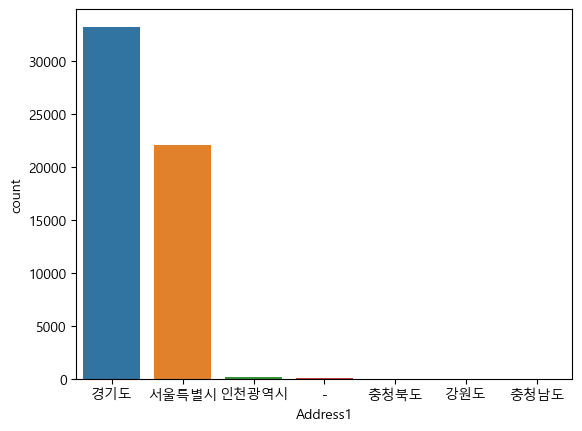

In [8]:
sns.countplot(x=df['Address1'])

In [9]:
df['Address1'].value_counts()

경기도      33217
서울특별시    22045
인천광역시      175
-           90
강원도          2
충청북도         1
충청남도         1
Name: Address1, dtype: int64

In [10]:
df= df[df['Address1'] != '-']

In [11]:
df['Address1'].value_counts()

경기도      33217
서울특별시    22045
인천광역시      175
강원도          2
충청북도         1
충청남도         1
Name: Address1, dtype: int64

<br>

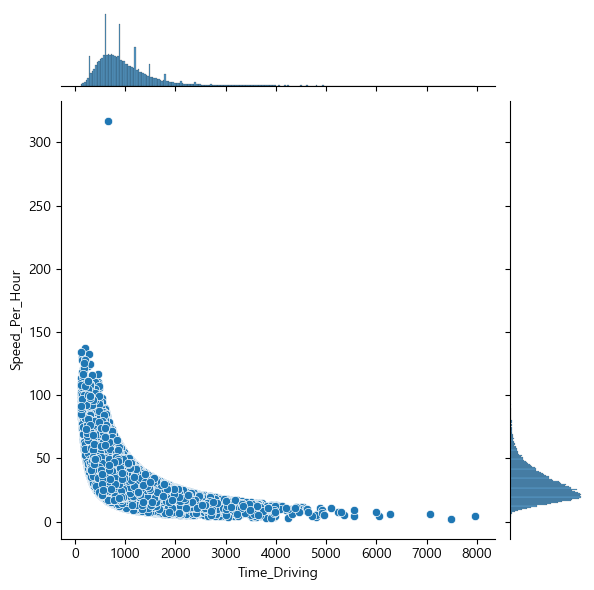

In [12]:
sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)

<br>

In [13]:
df_temp = df.drop(df[df['Speed_Per_Hour'] > 300].index)

<br>

In [14]:
df_temp.isnull().sum()

Time_Departure    0
Time_Arrival      0
Distance          2
Time_Driving      3
Speed_Per_Hour    5
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

In [15]:
df_na = df_temp.dropna()

In [16]:
df_na.isnull().sum()

Time_Departure    0
Time_Arrival      0
Distance          0
Time_Driving      0
Speed_Per_Hour    0
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

In [17]:
df_del = df_na.drop(['Time_Departure', 'Time_Arrival'], axis=1)

In [18]:
df_del.isnull().sum()

Distance          0
Time_Driving      0
Speed_Per_Hour    0
Address1          0
Address2          0
Signaltype        0
Weekday           0
Hour              0
Day               0
dtype: int64

<br>

In [19]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55431 entries, 0 to 55530
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Distance        55431 non-null  float64
 1   Time_Driving    55431 non-null  float64
 2   Speed_Per_Hour  55431 non-null  float64
 3   Address1        55431 non-null  object 
 4   Address2        55431 non-null  object 
 5   Signaltype      55431 non-null  int64  
 6   Weekday         55431 non-null  int64  
 7   Hour            55431 non-null  int64  
 8   Day             55431 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 4.2+ MB


In [20]:
oh_cols = ['Address1', 'Address2']
df_preset = pd.get_dummies(df_del, columns = oh_cols, drop_first = True)

<br>

## x y 분리

In [21]:
X = df_preset.drop('Time_Driving', axis=1)
y = df_preset['Time_Driving']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

<br>

## 모델링

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth = 5, min_samples_split = 3, random_state=120)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=120)

<br>

In [25]:
from sklearn.metrics import mean_absolute_error
y_pred = dt_model.predict(X_valid)
dt_mae = mean_absolute_error(y_valid, y_pred)
print(dt_mae)

113.87838566407876


<br>

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

<br>

## 딥러닝 모델링

In [27]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(87,)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

es = EarlyStopping(monitor='val_loss', patience=5) 

checkpoint_path = 'best_model.keras' 
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=16,
                   validation_data=(X_valid, y_valid),
                   callbacks=[es, mc]
                   )

Epoch 1/30
2758/2772 [============================>.] - ETA: 0s - loss: 160938.3125 - mae: 272.5314 - mse: 160938.3125
Epoch 1: val_loss improved from inf to 112541.57031, saving model to best_model.keras
2772/2772 [==============================] - 11s 3ms/step - loss: 160502.8906 - mae: 272.0985 - mse: 160502.8906 - val_loss: 112541.5703 - val_mae: 214.9263 - val_mse: 112541.5703
Epoch 2/30
2770/2772 [============================>.] - ETA: 0s - loss: 61487.6367 - mae: 161.2454 - mse: 61487.6367
Epoch 2: val_loss improved from 112541.57031 to 31895.84375, saving model to best_model.keras
2772/2772 [==============================] - 7s 3ms/step - loss: 61467.6602 - mae: 161.2131 - mse: 61467.6602 - val_loss: 31895.8438 - val_mae: 118.8505 - val_mse: 31895.8438
Epoch 3/30
2765/2772 [============================>.] - ETA: 0s - loss: 33737.9922 - mae: 118.4220 - mse: 33737.9922
Epoch 3: val_loss did not improve from 31895.84375
2772/2772 [==============================] - 8s 3ms/step - lo

<br>

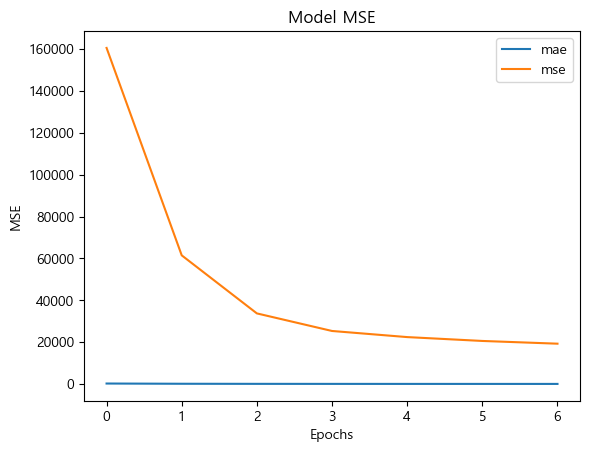

In [30]:
plt.plot(history.history["mae"], label="mae")
plt.plot(history.history["mse"], label="mse")
plt.title("Model MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()